In [ ]:
import os, sys
sys.path = sys.path[1:]
sys.path.insert(0, os.path.join(os.getcwd(), "helper_scripts"))
from global_variables_final_for_git import Global_Vars

In [ ]:
class Args(object):
    def __init__(self):
        self.gene = "NANOG"
        self.distance = 200
        self.use_tad_info = True
        self.pcc_lowerlimit_to_filter_dhss = 0.8
        self.take_log2_tpm = True
        self.filter_tfs_by = "pcc"  # or "pcc"
        self.lowerlimit_to_filter_tfs = 0.75
        self.take_this_many_top_fts = 15  # all dhss/tfs will already be filtered by pcc(or zscore)
        self.init_wts_type = "corr"
        self.outputDir = "/Users/Dinesh/Dropbox/Github/predicting_gex_with_nn_git/Output/testing"
        self.use_random_DHSs = True
        self.use_random_TFs = True
        self.max_iter = 500

args = Args()
gv = Global_Vars(args, args.outputDir)  # note this takes in new_output_dir as well in .py scripts

In [ ]:
gv.df_dhss

In [ ]:
gv.df_tfs

In [ ]:
# - EOF - 

In [3]:
# Checking the exprssion profile of BC genes.. (what am I dealing with here)
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
inputDir="/Users/Dinesh/Dropbox/Github/predicting_gex_with_nn_git/Input_files/"
csv_rnase = os.path.join(inputDir, "roadmap.rnase_imputed.LogRPKM.signal.mergedWTADlocs.txt")
Bgenes_file = os.path.join(os.getcwd(), "../../Input_files", "B.treatment.geneNamesOnly.txt")
Cgenes_file = os.path.join(os.getcwd(), "../../Input_files", "C.treatment.geneNamesOnly.txt")

In [10]:
'''Get BC genes'''
handleIn_bgenes = open(Bgenes_file)
bgenes = handleIn_bgenes.readlines()
handleIn_bgenes.close()

handleIn_cgenes = open(Cgenes_file)
cgenes = handleIn_cgenes.readlines()
handleIn_cgenes.close()

bgenes = [x.strip() for x in bgenes]
cgenes = [x.strip() for x in cgenes]
bc_genes = bgenes + cgenes  # len = 100 + 168 = 268

In [9]:
df = pd.read_csv(csv_rnase, header=0, sep="\t", index_col=[0,1,2])
print(df.shape)
df.head(3)

(27544, 127)


,,,E017_LNG.IMR90_IMR90,E002_ESC.WA7_ESC,E008_ESC.H9_ESC,E001_ESC.I3_ESC,E015_ESC.HUES6_ESC,E014_ESC.HUES48_ESC,E016_ESC.HUES64_ESC,E003_ESC.H1_ESC,E024_ESC.4STAR_ESC,E020_IPSC.20B_iPSC,...,E120_MUS.HSMM_ENCODE2012,E121_MUS.HSMMT_ENCODE2012,E122_VAS.HUVEC_ENCODE2012,E123_BLD.K562.CNCR_ENCODE2012,E124_BLD.CD14.MONO_ENCODE2012,E125_BRN.NHA_ENCODE2012,E126_SKIN.NHDFAD_ENCODE2012,E127_SKIN.NHEK_ENCODE2012,E128_LNG.NHLF_ENCODE2012,E129_BONE.OSTEO_ENCODE2012
geneName,loc,TAD_loc,,,,,,,,,,,,,,,,,,,,,
DDX11L1,chr1:11373-12373,chr1:10000-3460000,112.19,103.55,83.26,80.15,76.86,65.11,106.22,109.86,82.30,81.86,...,88.75,101.48,105.50,212.38,300.45,81.02,91.73,98.23,124.92,88.48
MIR6859-2,chr1:16936-17936,chr1:10000-3460000,2423.37,2169.75,2051.70,2119.40,2058.41,2070.94,2215.21,2226.48,2173.17,2114.16,...,2230.61,2041.39,2249.71,2783.41,3069.73,2173.70,2248.84,2402.39,2787.36,2168.68
WASH7P,chr1:28870-29870,chr1:10000-3460000,300.15,436.45,395.85,353.00,383.25,385.55,332.05,427.10,368.00,382.50,...,316.50,275.80,311.40,346.30,385.75,313.15,301.25,334.80,333.45,287.70


In [12]:
df = df[df.index.get_level_values("geneName").isin(bc_genes)]
print(df.shape)

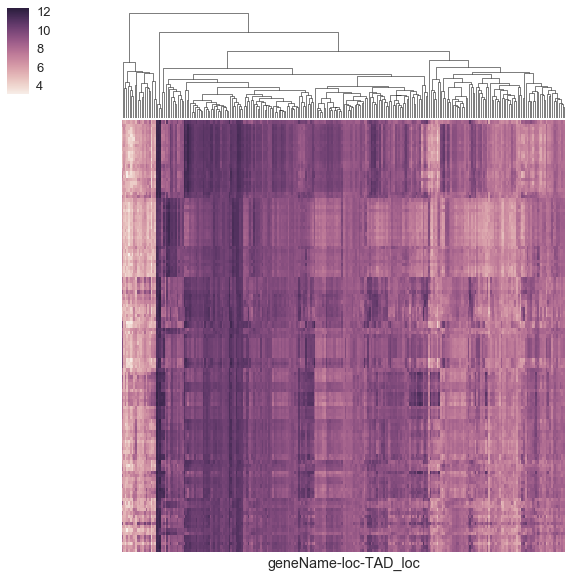

In [74]:
sns.set(font_scale=1.3)
plt.figure(figsize=(30,30))
sns.clustermap(np.log2(df+1).transpose(), row_cluster=False, xticklabels=False, yticklabels=False)

Text(0,0.5,u'Density')

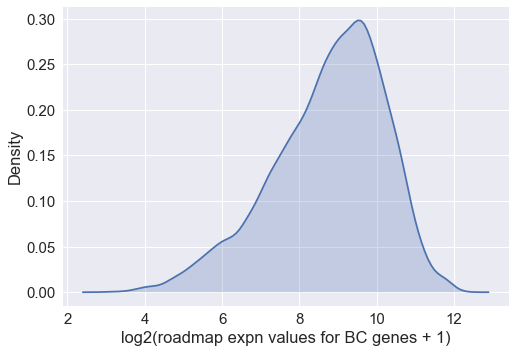

In [26]:
'''plot the distribution of the expression values'''
sns.set(font_scale=1.5)
x = np.array(np.log2(df+1).transpose()).flatten()
sns.kdeplot(x, shade=True)
plt.xlabel("log2(roadmap expn values for BC genes + 1)")
plt.ylabel("Density")

## Well, how do these profiles compare for the tpm values?

In [27]:
csv_tpm = "/Users/Dinesh/Dropbox/Github/predicting_gex_with_nn_git/previous_versions/predicting_gex_with_nn_v2/Input_files/merged_tpms.tsv"
csv_gencode = "/Users/Dinesh/Dropbox/Github/predicting_gex_with_nn_git/previous_versions/predicting_gex_with_nn_v2/Input_files/gencode.v19.annotation.genesOnly.reOrdered.txt"

In [31]:
df_tpm = pd.read_csv(csv_tpm, header=0, sep="\t")
print(df_tpm.shape)
df_tpm.head(3)

(58540, 64)


,gene_id,adrenal_gland_male_adult_37_years.rep1,astrocyte.rep1,astrocyte.rep2,bipolar_spindle_neuron_derived_from_induced_pluripotent_stem_cell.rep1,bipolar_spindle_neuron_derived_from_induced_pluripotent_stem_cell.rep2,body_of_pancreas_female_adult_51_year.rep1,body_of_pancreas_female_adult_53_years.rep1,cardiac_muscle_cell.rep1,cardiac_muscle_cell.rep2,...,skeletal_muscle_myoblast.rep1,skeletal_muscle_myoblast.rep2,spinal_cord_female_fetal_24_weeks_and_male_fetal_22_weeks.rep1,spinal_cord_female_fetal_24_weeks_and_male_fetal_22_weeks.rep2,spleen_female_adult_51_year.rep1,spleen_male_adult_54_years.rep1,stomach_female_fetal_40_weeks_and_male_fetal_36_weeks.rep1,stomach_female_fetal_40_weeks_and_male_fetal_36_weeks.rep2,thyroid_gland_female_fetal_37_weeks_and_female_fetal_40_weeks.rep1,thyroid_gland_female_fetal_37_weeks_and_female_fetal_40_weeks.rep2
0,21175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,21176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df_gencode = pd.read_csv(csv_gencode, header=None, sep="\t")
df_gencode.columns = ["chr", "start", "end", "strand", "geneName", "gene_id", "assembly", "num"]
print(df_gencode.shape)
df_gencode.head(3)

(57820, 8)


,chr,start,end,strand,geneName,gene_id,assembly,num
0,chr1,11869,14412,+,DDX11L1,ENSG00000223972.4,HAVANA,6
1,chr1,14363,29806,-,WASH7P,ENSG00000227232.4,HAVANA,27
2,chr1,29554,31109,+,MIR1302-11,ENSG00000243485.2,HAVANA,88


In [37]:
df_tpm = pd.merge(df_gencode, df_tpm, on=['gene_id'])
print(df_tpm.shape)
df_tpm.head()

(57820, 71)


,chr,start,end,strand,geneName,gene_id,assembly,num,adrenal_gland_male_adult_37_years.rep1,astrocyte.rep1,...,skeletal_muscle_myoblast.rep1,skeletal_muscle_myoblast.rep2,spinal_cord_female_fetal_24_weeks_and_male_fetal_22_weeks.rep1,spinal_cord_female_fetal_24_weeks_and_male_fetal_22_weeks.rep2,spleen_female_adult_51_year.rep1,spleen_male_adult_54_years.rep1,stomach_female_fetal_40_weeks_and_male_fetal_36_weeks.rep1,stomach_female_fetal_40_weeks_and_male_fetal_36_weeks.rep2,thyroid_gland_female_fetal_37_weeks_and_female_fetal_40_weeks.rep1,thyroid_gland_female_fetal_37_weeks_and_female_fetal_40_weeks.rep2
0,chr1,11869,14412,+,DDX11L1,ENSG00000223972.4,HAVANA,6,0.00,0.00,...,0.00,0.00,0.00,0.00,0.05,0.07,0.00,0.00,0.00,0.00
1,chr1,14363,29806,-,WASH7P,ENSG00000227232.4,HAVANA,27,2.01,1.55,...,1.83,1.74,0.72,0.83,2.19,3.95,0.51,1.04,0.39,0.35
2,chr1,29554,31109,+,MIR1302-11,ENSG00000243485.2,HAVANA,88,0.00,0.00,...,0.00,0.00,0.00,0.02,0.02,0.00,0.00,0.00,0.00,0.00
3,chr1,34554,36081,-,FAM138A,ENSG00000237613.2,HAVANA,98,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,chr1,52473,54936,+,OR4G4P,ENSG00000268020.2,HAVANA,106,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [39]:
df_tpm_bc = df_tpm[df_tpm["geneName"].isin(bc_genes)]
df_tpm_bc = df_tpm_bc.drop(["chr", "start", "end", "strand", "gene_id", "assembly", "num"], axis=1)
df_tpm = df_tpm_bc.set_index("geneName")

In [56]:
print(df_tpm_bc.shape)
df_tpm_bc = df_tpm_bc.set_index("geneName")

(261, 64)


In [57]:
df_tpm_bc.head()

,adrenal_gland_male_adult_37_years.rep1,astrocyte.rep1,astrocyte.rep2,bipolar_spindle_neuron_derived_from_induced_pluripotent_stem_cell.rep1,bipolar_spindle_neuron_derived_from_induced_pluripotent_stem_cell.rep2,body_of_pancreas_female_adult_51_year.rep1,body_of_pancreas_female_adult_53_years.rep1,cardiac_muscle_cell.rep1,cardiac_muscle_cell.rep2,fibroblast_of_arm_male_adult_53_years.rep1,...,skeletal_muscle_myoblast.rep1,skeletal_muscle_myoblast.rep2,spinal_cord_female_fetal_24_weeks_and_male_fetal_22_weeks.rep1,spinal_cord_female_fetal_24_weeks_and_male_fetal_22_weeks.rep2,spleen_female_adult_51_year.rep1,spleen_male_adult_54_years.rep1,stomach_female_fetal_40_weeks_and_male_fetal_36_weeks.rep1,stomach_female_fetal_40_weeks_and_male_fetal_36_weeks.rep2,thyroid_gland_female_fetal_37_weeks_and_female_fetal_40_weeks.rep1,thyroid_gland_female_fetal_37_weeks_and_female_fetal_40_weeks.rep2
geneName,,,,,,,,,,,,,,,,,,,,,
ERRFI1,2.63,130.20,195.54,6.90,6.29,3.83,10.39,5.95,6.94,24.18,...,32.43,33.19,4.81,6.53,1.13,1.77,10.61,7.92,7.13,5.21
SLC2A5,6.90,0.04,1.02,1.74,0.78,0.01,0.02,0.17,0.00,0.25,...,11.33,9.79,0.45,1.65,1.71,0.85,0.49,0.18,0.70,0.43
EFHD2,9.06,18.98,18.87,2.41,2.85,1.70,2.98,49.79,36.60,43.19,...,4.72,3.54,1.10,1.07,19.31,27.37,3.54,2.86,1.63,0.47
ALPL,4.35,1.53,0.60,16.56,16.36,0.33,0.13,0.68,0.17,0.79,...,28.82,28.75,0.85,1.05,6.57,11.59,0.17,0.15,0.33,0.13
ID3,4.68,94.89,168.44,57.13,53.20,3.53,2.50,838.60,584.49,549.37,...,58.92,46.93,19.37,11.86,7.27,4.33,5.75,11.45,10.34,4.60


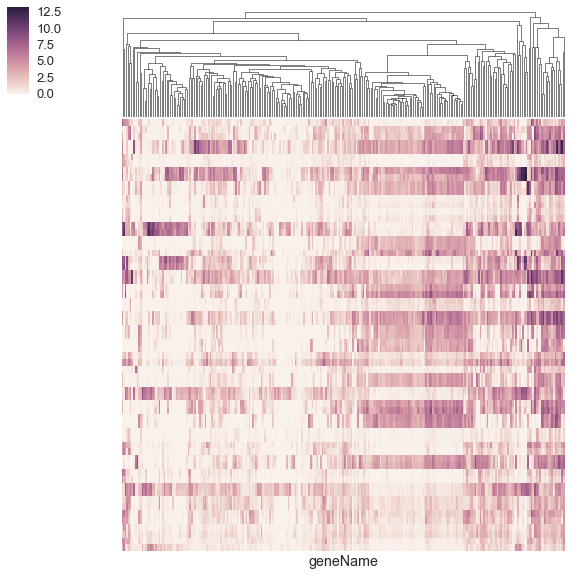

In [73]:
sns.set(font_scale=1.3)
plt.figure(figsize=(30,30))
sns.clustermap(np.log2(df_tpm_bc+1).transpose(), row_cluster=False, xticklabels=False, yticklabels=False)

Text(0,0.5,u'Density')

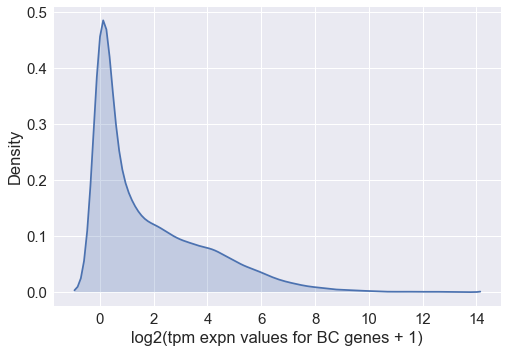

In [70]:
'''plot the distribution of the expression values'''
sns.set(font_scale=1.5)
x = np.array(np.log2(df_tpm_bc+1).transpose()).flatten()
sns.kdeplot(x, shade=True)
plt.xlabel("log2(tpm expn values for BC genes + 1)")
plt.ylabel("Density")

## So what does the roadmap matrix look like after 0-1 scaling?

In [93]:
df.head(2)

,,,E017_LNG.IMR90_IMR90,E002_ESC.WA7_ESC,E008_ESC.H9_ESC,E001_ESC.I3_ESC,E015_ESC.HUES6_ESC,E014_ESC.HUES48_ESC,E016_ESC.HUES64_ESC,E003_ESC.H1_ESC,E024_ESC.4STAR_ESC,E020_IPSC.20B_iPSC,...,E120_MUS.HSMM_ENCODE2012,E121_MUS.HSMMT_ENCODE2012,E122_VAS.HUVEC_ENCODE2012,E123_BLD.K562.CNCR_ENCODE2012,E124_BLD.CD14.MONO_ENCODE2012,E125_BRN.NHA_ENCODE2012,E126_SKIN.NHDFAD_ENCODE2012,E127_SKIN.NHEK_ENCODE2012,E128_LNG.NHLF_ENCODE2012,E129_BONE.OSTEO_ENCODE2012
geneName,loc,TAD_loc,,,,,,,,,,,,,,,,,,,,,
ERRFI1,chr1:8085893-8086893,chr1:7880000-8440000,963.85,694.05,728.87,776.76,778.33,812.18,717.40,753.72,688.96,719.47,...,961.65,1074.79,883.89,482.78,253.68,1035.39,927.89,1078.44,1016.74,993.53
SLC2A5,chr1:9129387-9130387,chr1:8440000-9140000,184.65,122.38,92.11,71.66,65.75,63.37,63.38,79.26,81.00,56.51,...,147.02,377.92,168.26,269.93,574.00,223.64,206.02,135.03,139.54,250.64


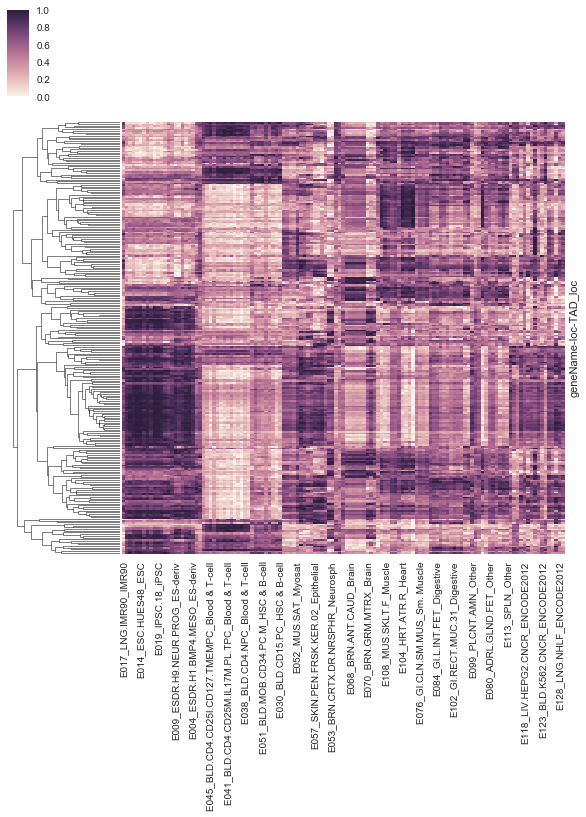

In [96]:
x = np.log2(df+1)  # x has genes as rows, and samples as cols
sns.set(font_scale=1)
plt.figure(figsize=(40,40))
sns.clustermap(x, standard_scale=0, row_cluster=True, col_cluster=False, xticklabels=5, yticklabels=False)